# <center>高频交易简介</center>

<p>&nbsp</p>

<center><b>陈海强 教授</b></center>

<p></p>

<center>厦门大学王亚南经济研究院</center>

## 1. 引入

## 2. 高频交易概念

## 3. 高频交易策略

### 3.1 订单拆分策略


#### 3.1.1 冰山订单

#### 3.1.2 TWAP（Time-Weighted Average Price）

#### 3.1.3 VWAP（Volume-Weighted Average Price）

### 3.2 流动性回扣交易


### 3.3 猎物算法交易


### 3.4 套利策略

#### 3.4.1 跨市场套利

#### 3.4.2 统计套利

### 3.5 做市商策略

### 3.6 定量化交易策略

#### 3.6.1 事件套利(event arbitrage)

#### 3.6.2 盘口交易(ticker tape trading)

#### 3.6.3 配对交易(pairtrading)

第1步：数据获取

构建HFT算法的第一步是获取想要交易资产的实际金融数据。我们将使用yfinance库下载一系列不同证券（包括股票、指数和加密货币）的历史价格数据。在这里首先导入必要的库，并下载所选资产的数据。

In [29]:
import yfinance as yf
 
# 下载所选资产的历史价格数据
assets = ['GOOG', 'AAPL', 'BTC-USD', 'ETH-USD']  # Example of diverse securities
start_date = '2023-01-01'
end_date = '2023-12-31'
 
data = yf.download(assets, start=start_date, end=end_date)

[*********************100%%**********************]  4 of 4 completed


第2步：数据预处理和分析

在获得了历史价格数据后，我们需要对其进行预处理和分析，以识别潜在的套利机会。首先，可以将所选资产在一段时间内的价格走势可视化，以深入了解和分析其行为。

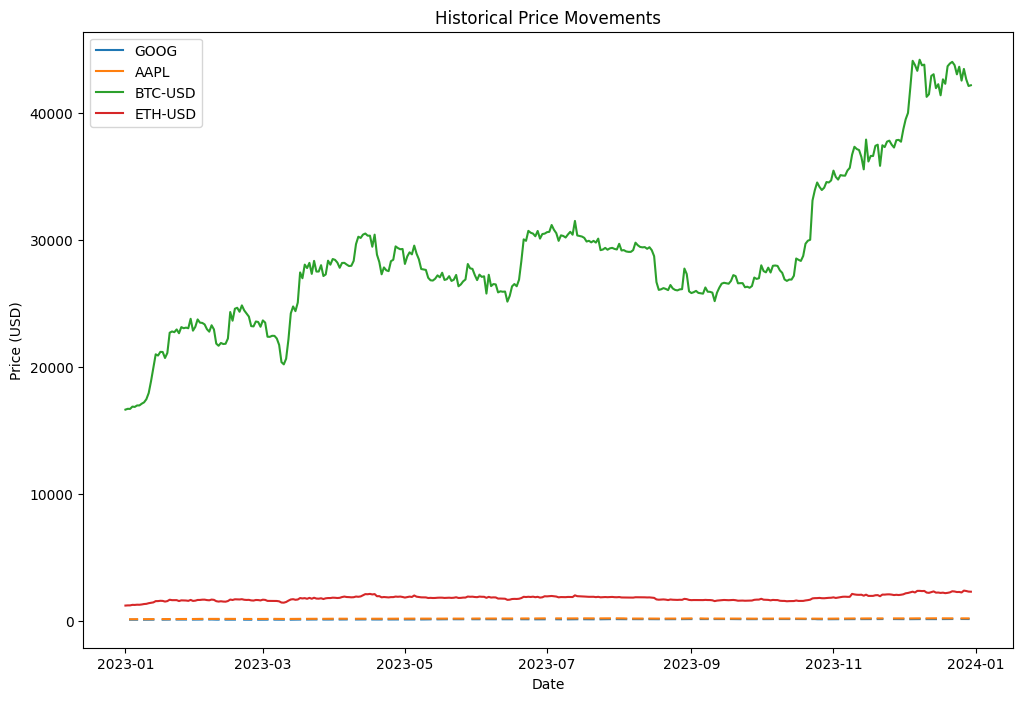

In [30]:
import matplotlib.pyplot as plt
 
# 可视化所选资产的价格走势
plt.figure(figsize=(12, 8))
for asset in assets:
    plt.plot(data['Close'][asset], label=asset)
 
plt.title('Historical Price Movements')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
 
plt.show()

上图直观地展示了所选资产的历史价格走势。通过分析这样的可视化结果，我们可以根据价格差异识别潜在的套利机会。

第3步：实施套利策略

现在，既然已经分析了历史价格数据，我们就可以根据观察到的价格差异来实施套利策略。一种常见的套利策略是“配对交易”策略，它涉及到识别出历史上具有密切关系的两个资产，并利用它们价格的暂时分歧来获取利润。

让我们使用所获取的历史价格数据来实施一个简单的配对交易策略。

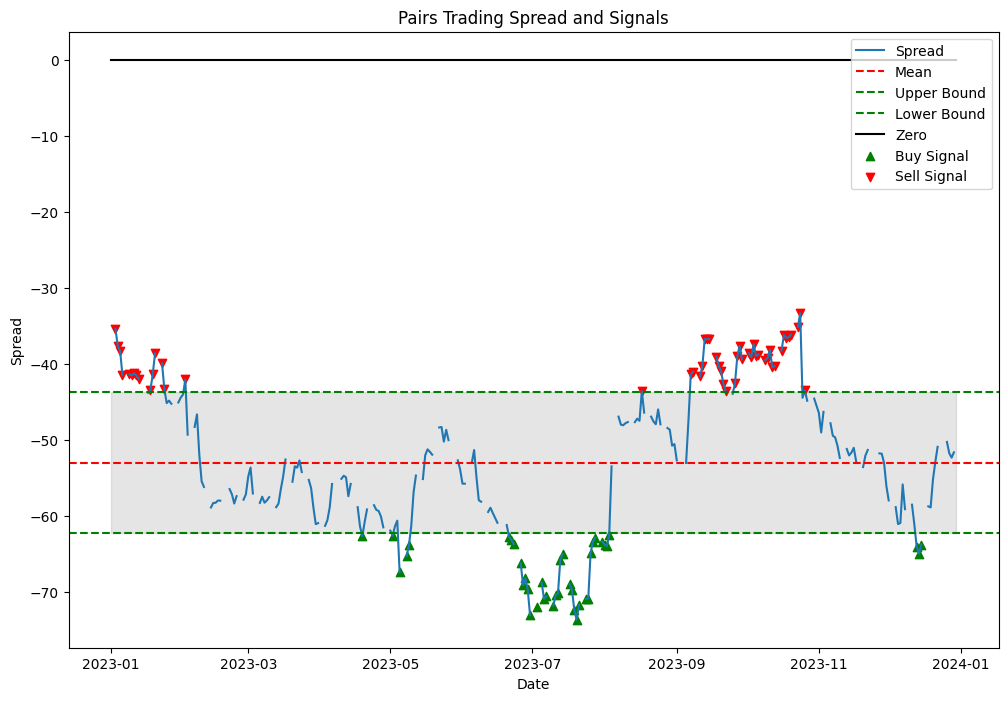

In [31]:
import numpy as np
 
# 实施一个简单的配对交易策略
asset1 = 'GOOG'
asset2 = 'AAPL'
 
spread = data['Close'][asset1] - data['Close'][asset2]
spread_mean = np.mean(spread)
spread_std = np.std(spread)
 
# 根据价格差生成买入/卖出信号
z_score = (spread - spread_mean) / spread_std
buy_signal = z_score < -1.0
sell_signal = z_score > 1.0
 
# 可视化价格差和买入/卖出信号
plt.figure(figsize=(12, 8))
plt.plot(spread, label='Spread')
plt.axhline(spread_mean, color='r', linestyle='--', label='Mean')
plt.axhline(spread_mean + spread_std, color='g', linestyle='--', label='Upper Bound')
plt.axhline(spread_mean - spread_std, color='g', linestyle='--', label='Lower Bound')
plt.fill_between(spread.index, spread_mean + spread_std, spread_mean - spread_std, color='gray', alpha=0.2)
plt.plot(spread.index, np.zeros(len(spread)), 'k-', label='Zero')
plt.scatter(spread[buy_signal].index, spread[buy_signal], marker='^', color='g', label='Buy Signal')
plt.scatter(spread[sell_signal].index, spread[sell_signal], marker='v', color='r', label='Sell Signal')
plt.title('Pairs Trading Spread and Signals')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
 
plt.show()

上述图表可视化了两个选定资产价格之间的差异，以及根据差异的Z值生成的买入和卖出信号。这清晰地展示了基于配对交易策略的潜在交易机会。

第4步：回溯测试和绩效评估

在实施套利策略之后，通过使用历史数据来回溯测试策略以评估其绩效是至关重要的。我们可以分析与策略相关的盈利能力和风险，以确定其在实际交易场景中的可行性。

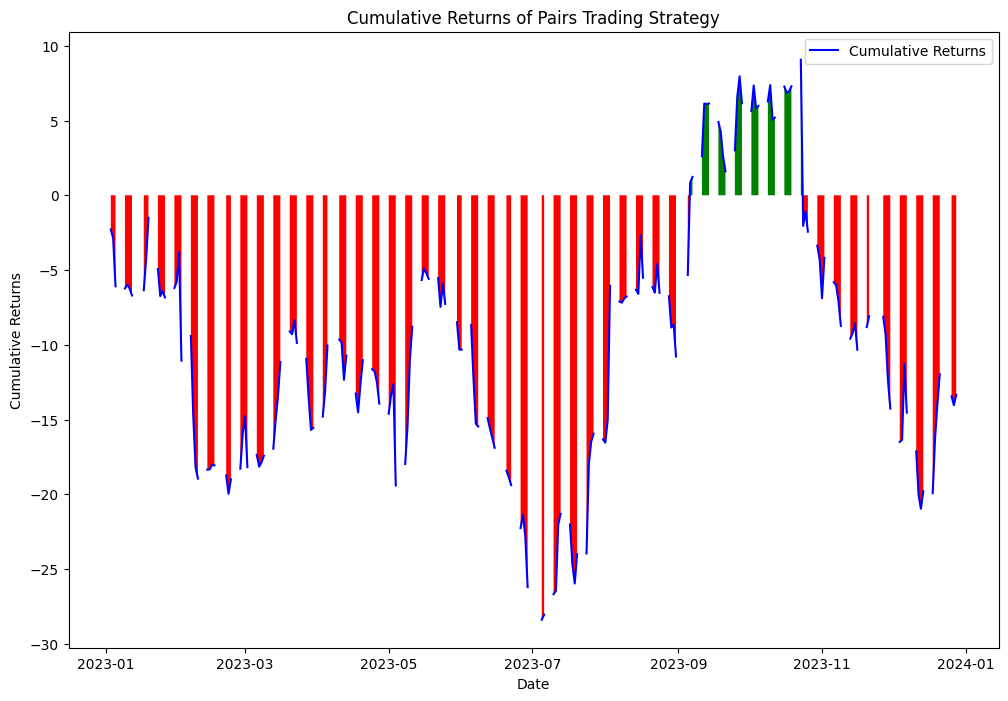

In [32]:
# 对配对交易策略进行回溯测试
returns = spread.shift(-1) - spread
cumulative_returns = returns.cumsum()
 
# 可视化累计收益
plt.figure(figsize=(12, 8))
plt.plot(cumulative_returns, label='Cumulative Returns', color='b')
plt.fill_between(cumulative_returns.index, 0, cumulative_returns, where=(cumulative_returns >= 0), facecolor='green', interpolate=True)
plt.fill_between(cumulative_returns.index, 0, cumulative_returns, where=(cumulative_returns <= 0), facecolor='red', interpolate=True)
plt.title('Cumulative Returns of Pairs Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
 
plt.show()

原文链接：https://blog.csdn.net/weixin_39915649/article/details/135665195

## 4. 高频交易案例

## 参考资料

- [37+ High-Frequency Trading (HFT) Strategies](https://www.daytrading.com/hft-strategies)